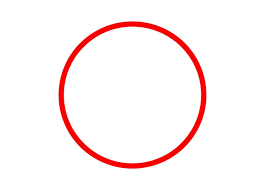

In [ ]:
from PIL import Image
image_path='/content/abc.png'
image=Image.open(image_path)
image


In [ ]:
width,height=image.size
print(f"Image size is {width} * {height}")

Image size is 265 * 190


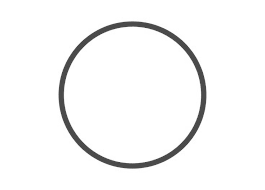

In [ ]:
gray_image=image.convert('L')
gray_image

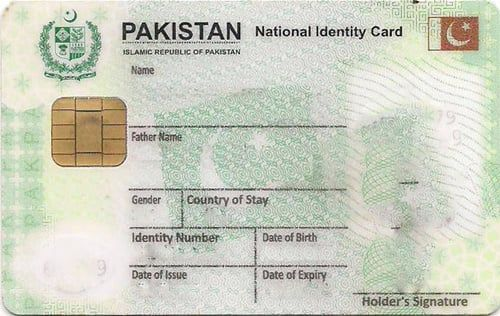

In [ ]:
from PIL import Image,ImageDraw
import numpy as np
image_path='/content/idcard.jpg'
image=Image.open(image_path)
image

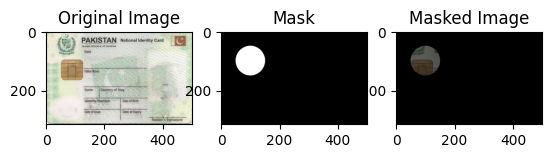

In [ ]:
mask_size=image.size
mask=Image.new('L',mask_size,0)
mask_draw=ImageDraw.Draw(mask)
mask_draw.ellipse((50,50,150,150),fill=100)

masked_image=Image.new('RGB',image.size)
masked_image.paste(image,mask=mask)

import matplotlib.pyplot as plt

# Display the original image, mask, and masked image
plt.subplot(1, 3, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(mask, cmap='gray'), plt.title('Mask')
plt.subplot(1, 3, 3), plt.imshow(masked_image), plt.title('Masked Image')
plt.show()



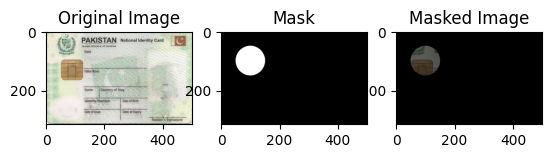

In [ ]:
mask_size=image.size
mask=Image.new('L',mask_size,0)
mask_draw=ImageDraw.Draw(mask)
mask_draw.ellipse((50,50,150,150),fill=100)

masked_image=Image.new('RGB',image.size)
masked_image.paste(image,mask=mask)

import matplotlib.pyplot as plt

# Display the original image, mask, and masked image
plt.subplot(1, 3, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(mask, cmap='gray'), plt.title('Mask')
plt.subplot(1, 3, 3), plt.imshow(masked_image), plt.title('Masked Image')
plt.show()



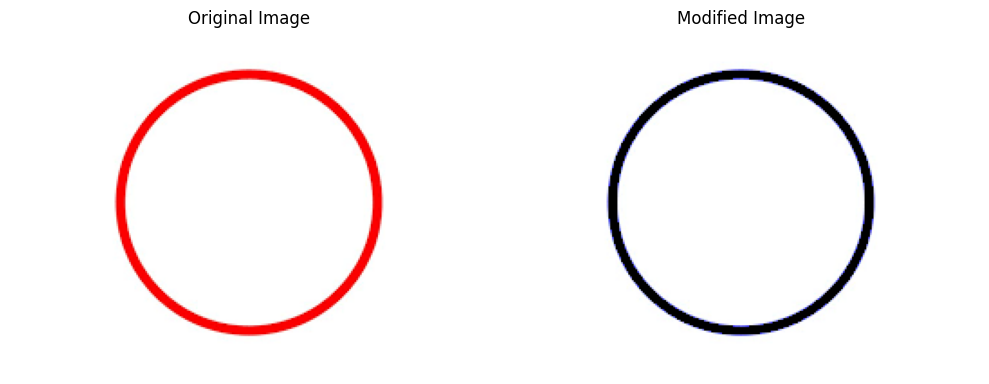

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Step 1: Load the image using OpenCV
image_path = "abc.png"  # Replace with the path to your image file
image = cv2.imread(image_path)
# Step 2: Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Step 3: Create a mask to identify the red region
lower_red = np.array([100, 0, 0])  # Adjust the lower bound for red color in RGB
upper_red = np.array([255, 50, 50])  # Adjust the upper bound for red color in RGB
red_mask = cv2.inRange(image_rgb, lower_red, upper_red)
# Step 4: Change the color of the red region to black
black_color = (0, 0, 0)
image_rgb[np.where(red_mask)] = black_color
# Step 5: Convert the modified image back to BGR for saving with OpenCV
image_bgr_modified = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
# Step 6: Save the modified image
cv2.imwrite("circleAndHandSign.jpg", image_bgr_modified)
# Step 7: Display the original and modified images using Pillow
# original_pillow_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# modified_pillow_image = Image.fromarray(image_rgb)
# original_pillow_image.show(title="Original Image")
# modified_pillow_image.show(title="Modified Image")
# image_rgb_modified = cv2.cvtColor(image_bgr_modified, cv2.COLOR_BGR2RGB)
# Display the images using matplotlib.pyplot
plt.figure(figsize=(10, 5))
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
# Display the modified image
plt.subplot(1, 2, 2)
plt.imshow(image_bgr_modified)
plt.title('Modified Image')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import os
import cv2
import numpy as np

def process_image(image1_path, image2_path):
    # Load the first image
    image = cv2.imread(image1_path)
    # Resize the image to 113x43
    image = cv2.resize(image, (113, 43))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_black_gray = np.array([0, 0, 0])
    upper_black_gray = np.array([100, 255, 100])
    black_gray_mask = cv2.inRange(hsv, lower_black_gray, upper_black_gray)
    # Load the second image
    image_2 = cv2.imread(image2_path)
    # Extract the roi from the second image
    left_upper = (367, 235)
    right_bottom = (480, 278)
    roi = image_2[left_upper[1]:right_bottom[1], left_upper[0]:right_bottom[0]]
    roi[black_gray_mask != 0] = [0, 0, 0]
    return image_2

# Input and output directories
input_directory = "/content/drive/MyDrive/datasets/data11"
output_directory = "/content/drive/MyDrive/datasets/data22"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Process each image in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        # Read the image
        image1_path = os.path.join(input_directory, filename)
        image2_path = "idcard.jpg"  # You may want to replace this with the actual path
        processed_image = process_image(image1_path, image2_path)

        # Output path for the processed image
        output_path = os.path.join(output_directory, f"Processed_{filename}")

        # Save the processed image
        cv2.imwrite(output_path, processed_image)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')